### Import Relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from mrmr import mrmr_regression
from sklearn.preprocessing import MinMaxScaler






### Data Analysis and Features selection

In [2]:
patient = pd.read_csv('Patient 301_data.csv')

In [3]:
patient.describe()

,hm_mode0,hm_mode1,hm_mode2,hm_mode3,hm_mode4,hc_mode0,hc_mode1,hc_mode2,hc_mode3,hc_mode4,...,Disp_mode1,Disp_mode2,Disp_mode3,Disp_mode4,dispm_mode0,dispm_mode1,dispm_mode2,dispm_mode3,dispm_mode4,BIS
count,9048.000000,9048.000000,9048.000000,9048.000000,9048.000000,9048.000000,9048.000000,9048.000000,9048.000000,9048.000000,...,9048.000000,9048.000000,9048.000000,9048.000000,9048.000000,9048.000000,9048.000000,9048.000000,9048.000000,9048.000000
mean,0.034782,0.183478,0.540636,1.185446,1.460612,6.266123,1.482503,1.046607,1.013824,1.007060,...,1.723040,1.863489,2.032626,2.063867,0.907167,1.434968,2.004483,2.032429,1.966942,43.850718
std,0.007324,0.010543,0.013032,0.011313,0.009570,3.437078,0.139676,0.013136,0.002921,0.002825,...,0.024326,0.016905,0.007782,0.009449,0.059636,0.022846,0.009716,0.001371,0.003322,7.334737
min,0.005640,0.120499,0.480272,1.135104,1.305310,3.213019,0.903326,0.935222,0.931493,0.983608,...,1.608638,1.810957,1.978251,1.923106,0.485778,1.332565,1.973951,2.027554,1.956439,26.800000
25%,0.031117,0.177814,0.531956,1.179172,1.456478,4.788495,1.419561,1.039156,1.013473,1.006691,...,1.708173,1.852253,2.027465,2.061733,0.896480,1.420487,1.997980,2.031530,1.964656,39.500000
50%,0.034499,0.181887,0.537397,1.182550,1.458346,5.223697,1.445538,1.043517,1.014284,1.007208,...,1.721271,1.863832,2.032767,2.065680,0.914269,1.432680,2.003529,2.032449,1.966910,43.000000
75%,0.038414,0.187859,0.545940,1.186192,1.460790,6.236435,1.488972,1.048122,1.015040,1.007701,...,1.737364,1.874770,2.038047,2.068254,0.935233,1.447360,2.009660,2.033340,1.969154,45.900000
max,0.098544,0.222053,0.621272,1.266463,1.496181,43.001996,3.397222,1.251170,1.051505,1.095951,...,1.796019,1.933240,2.055263,2.075599,0.994973,1.509159,2.044894,2.037585,1.981831,97.200000


In [4]:
X=patient.drop('BIS', axis=1)
y= patient['BIS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear regression

In [5]:
metrics = {}
def plot_regression(data, column):
    
    global metrics
    
    X = data[column].values.reshape(-1, 1)
    #X = X[:, np.newaxis]
    y = data['BIS']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Perform regression
    reg = LinearRegression(n_jobs=-1).fit(X_train_scaled, y_train)
    
    # Predictions
    y_predicted = reg.predict(X_test_scaled)
    
    # Show the score and r2
    #mse = mean_squared_error(y, y_predicted)
    r2 = r2_score(y_test, y_predicted)
    
    # keep track of metrics
    
    #metrics["{}_mse".format(column)] = mse
    metrics["{}_r2".format(column)] = r2
    
    
    # Plot the graph#
    plt.figure(figsize=(8,6))
    plt.scatter(data[column], data['BIS'], label="data", c="blue")
    plt.plot(X_test, y_predicted, label="Regression", c="red")
    plt.xlabel(column)
    plt.ylabel('BIS')
    plt.legend(loc="upper left")
    plt.show()

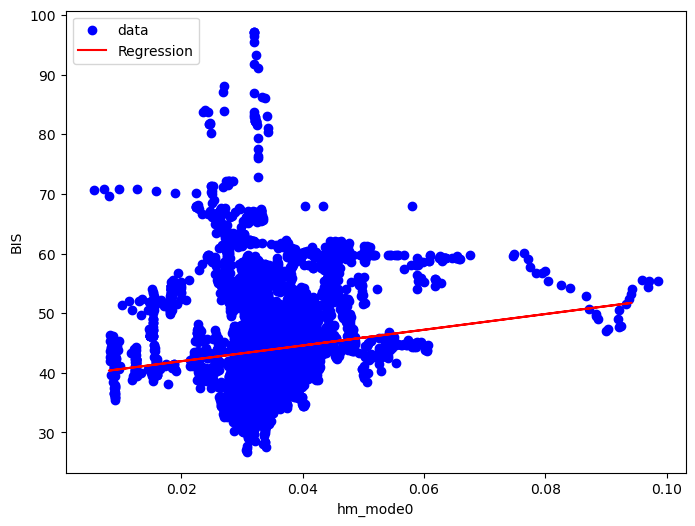

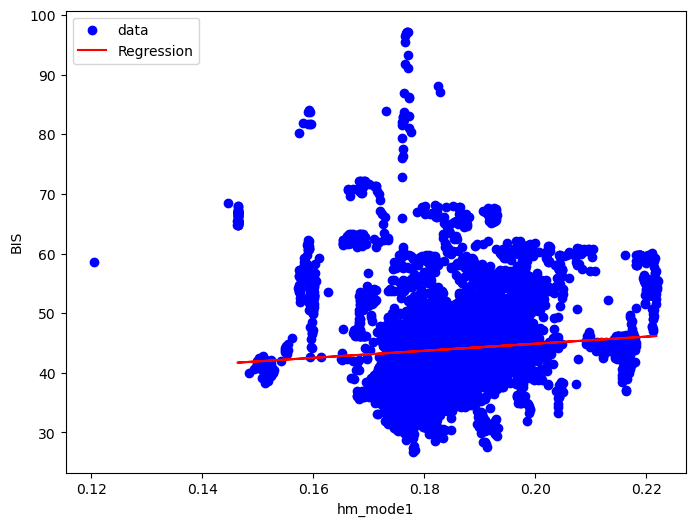

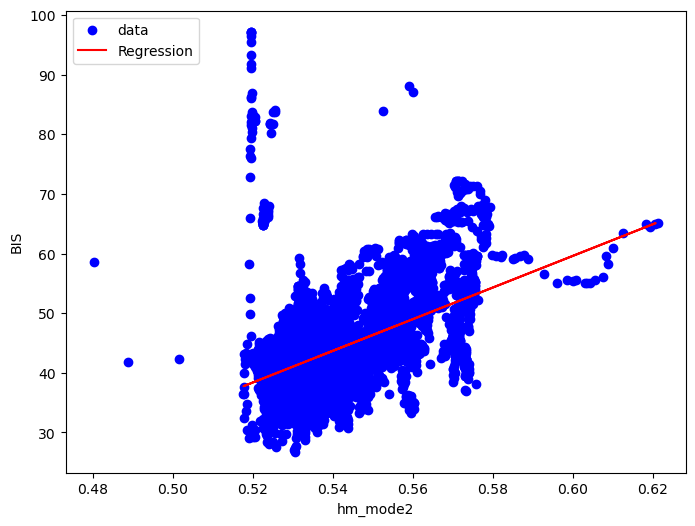

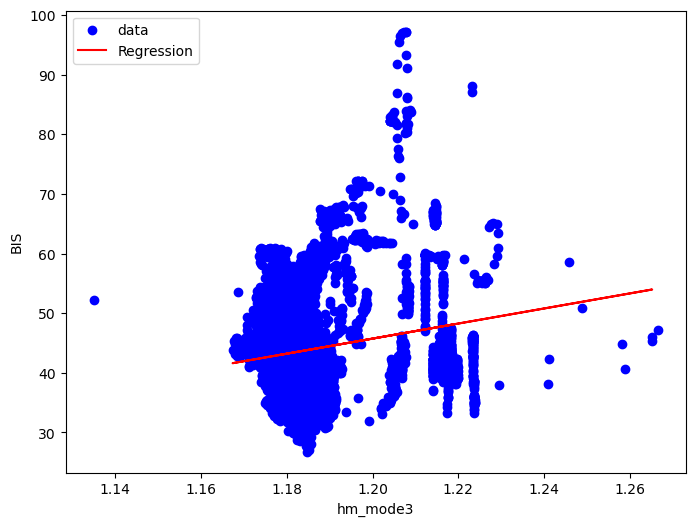

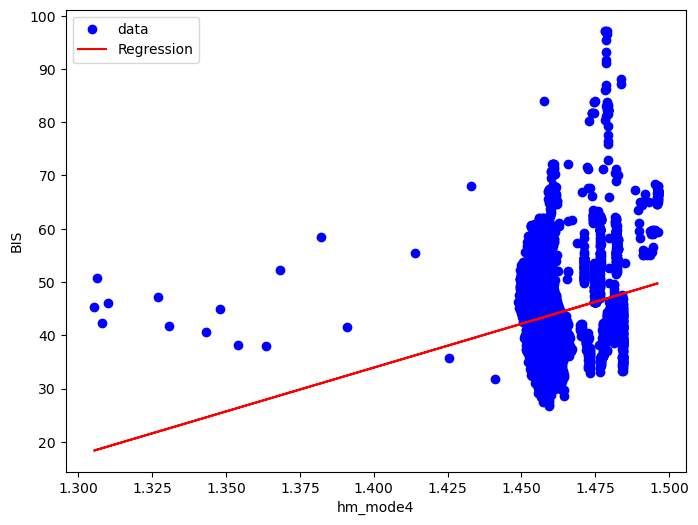

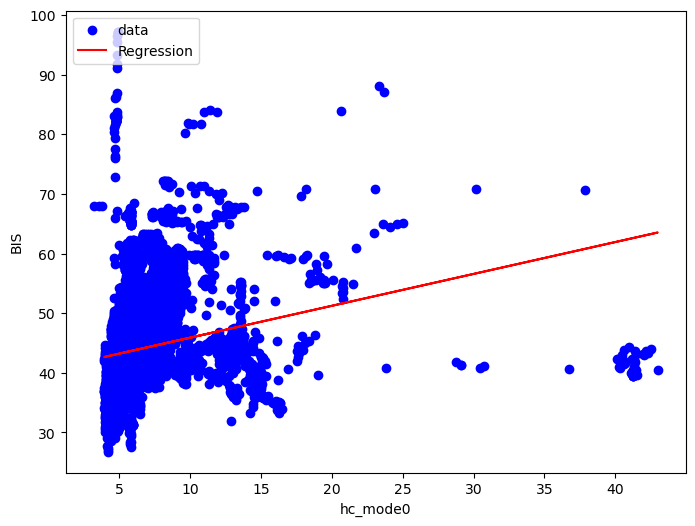

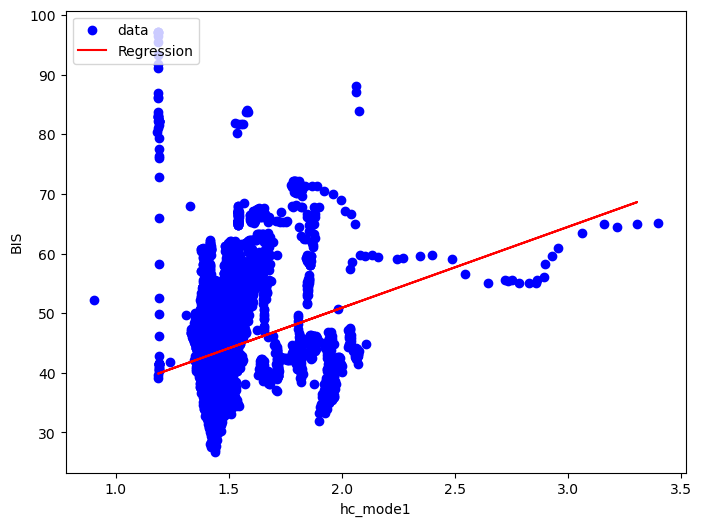

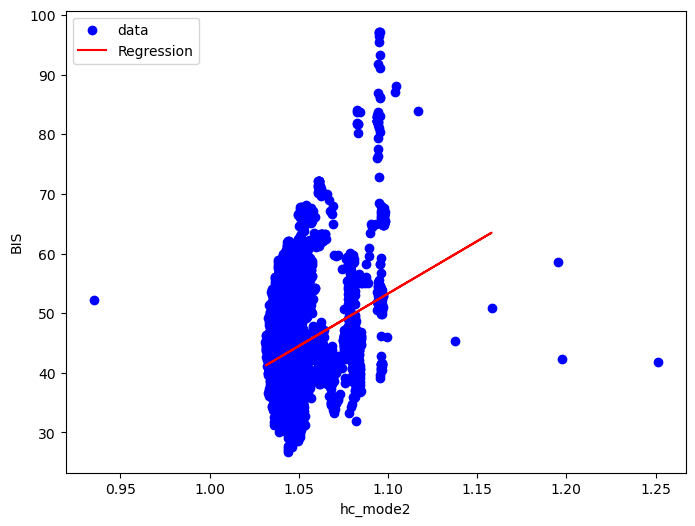

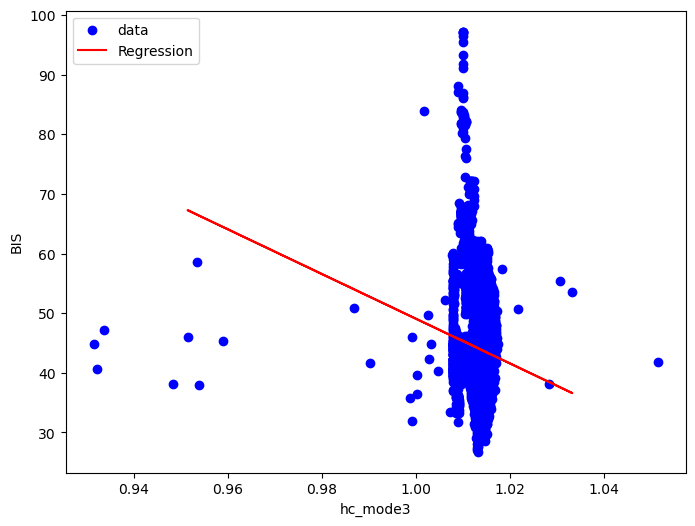

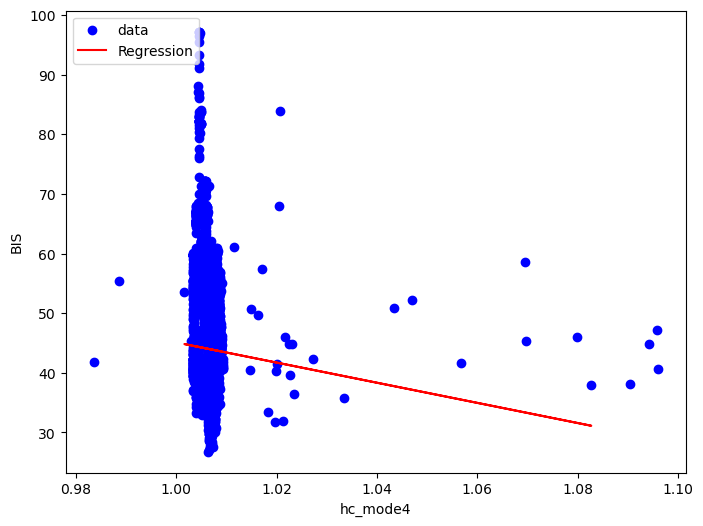

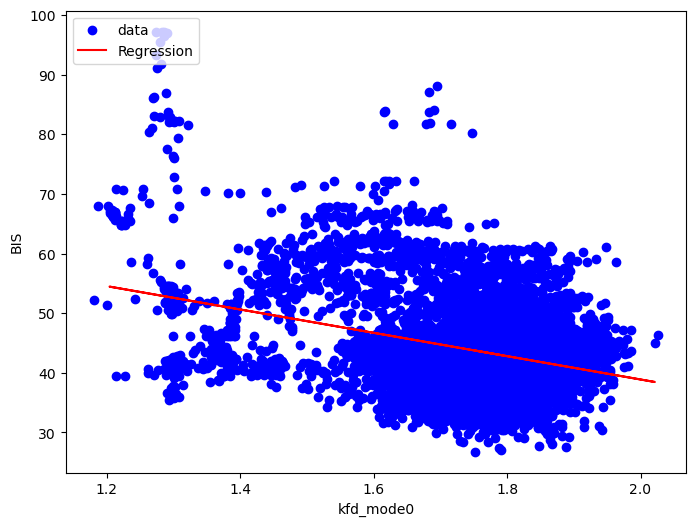

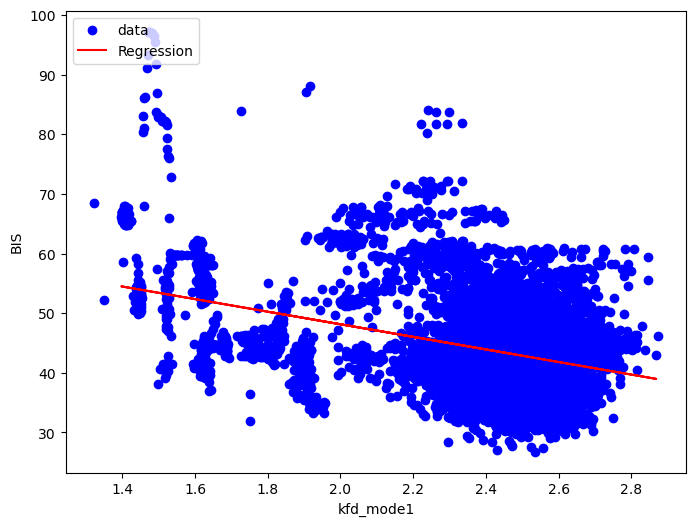

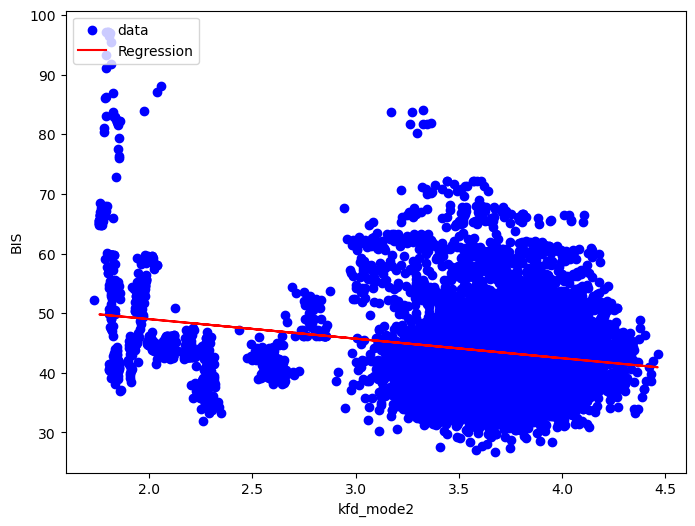

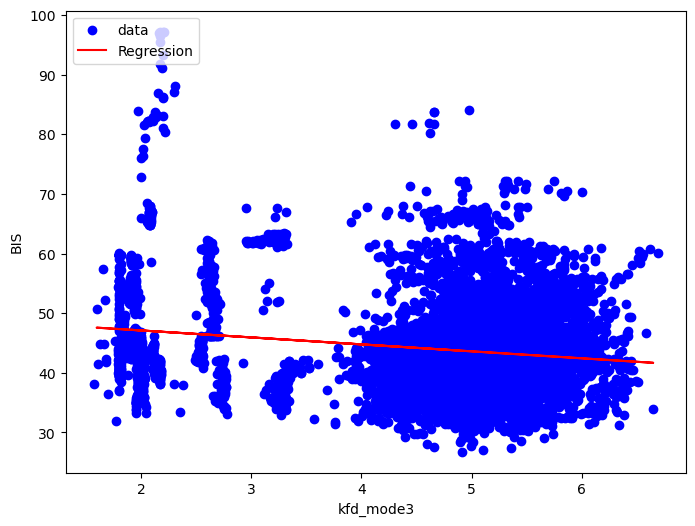

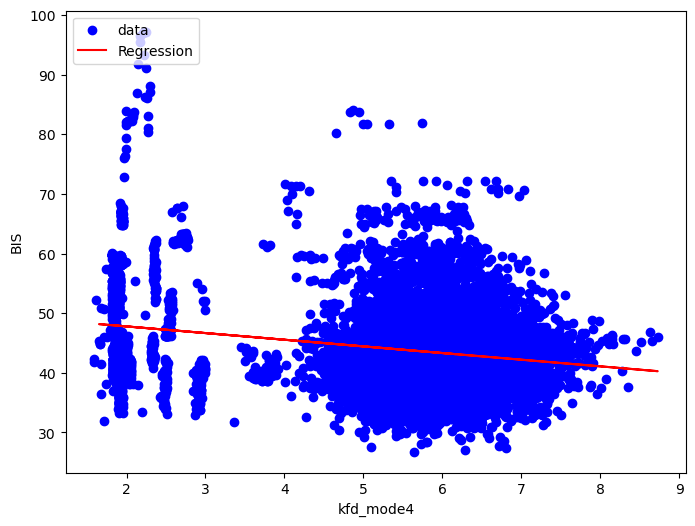

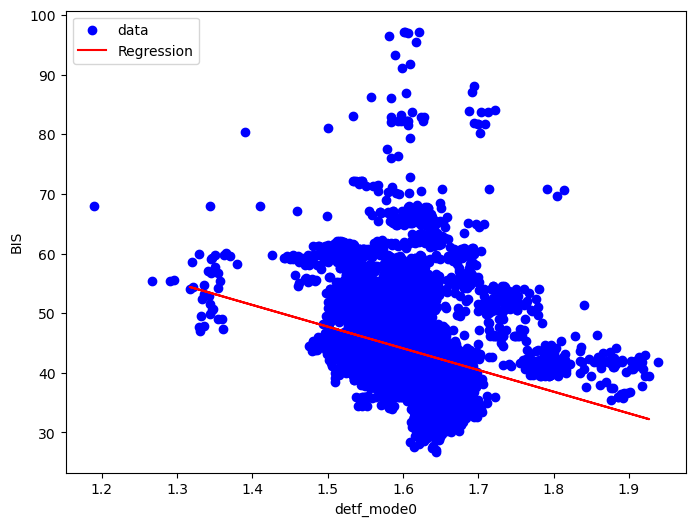

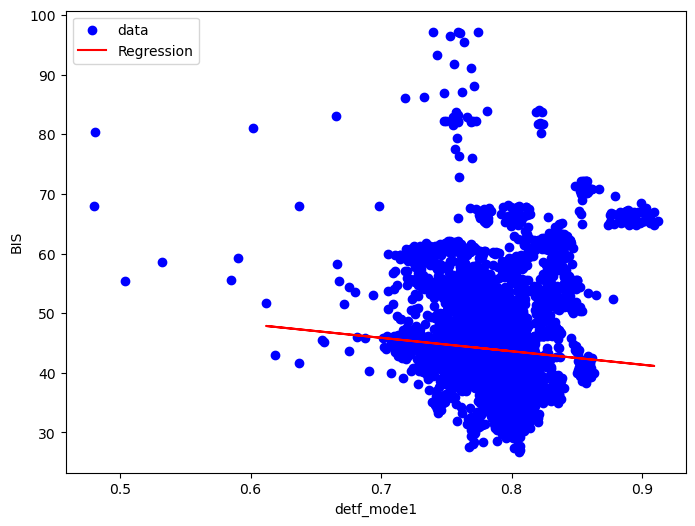

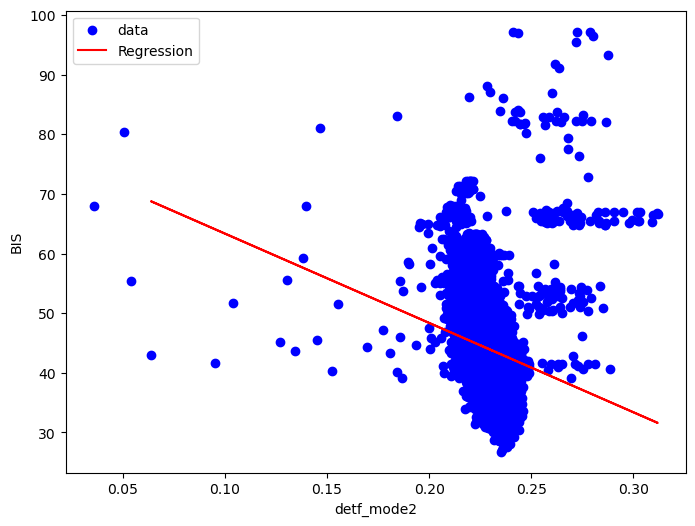

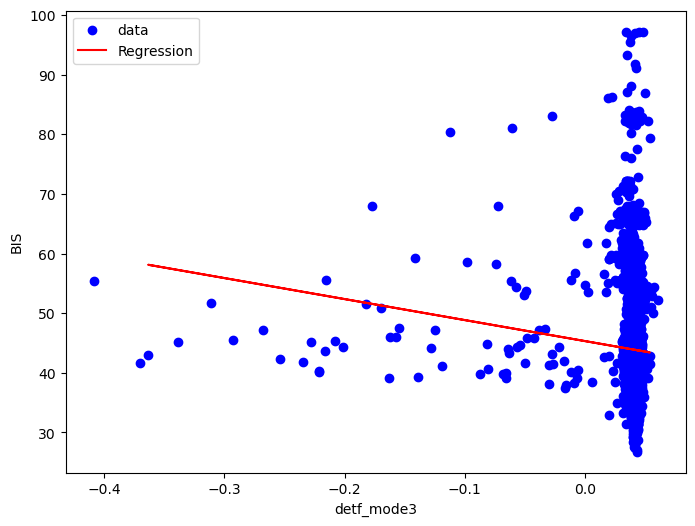

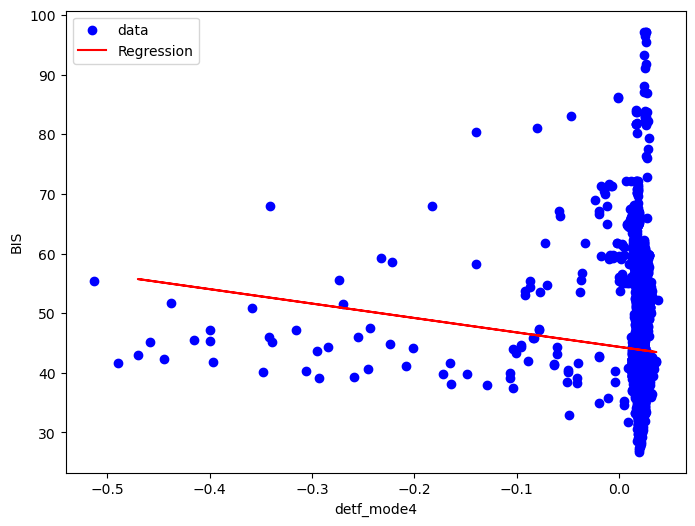

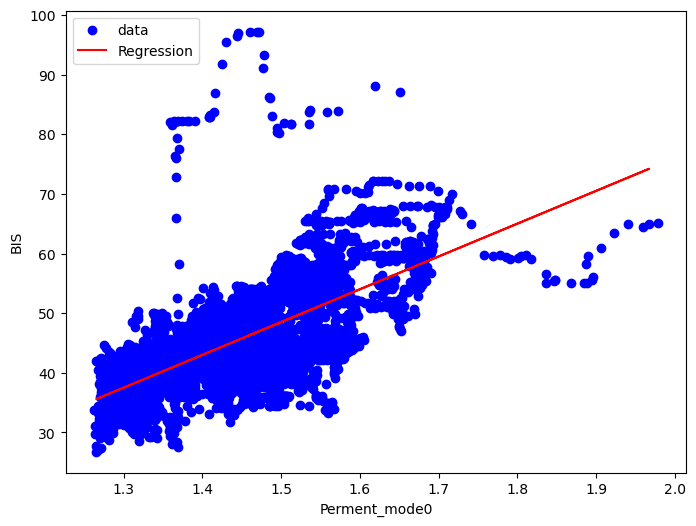

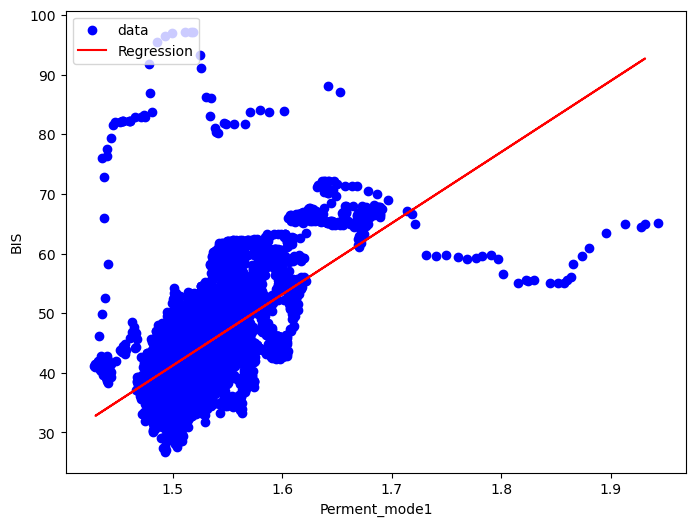

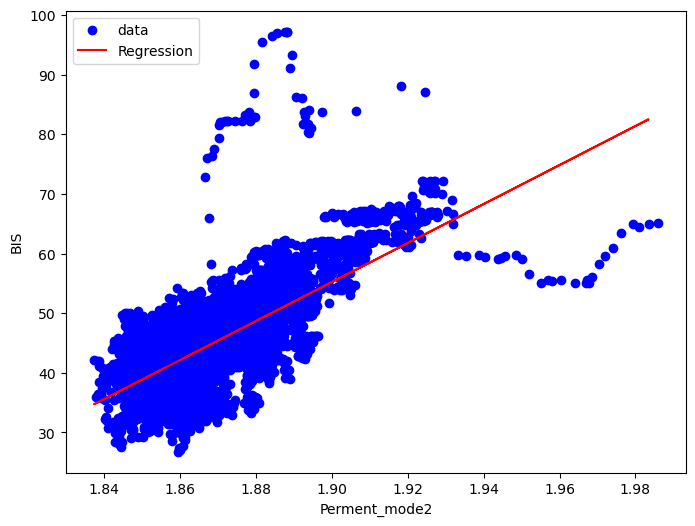

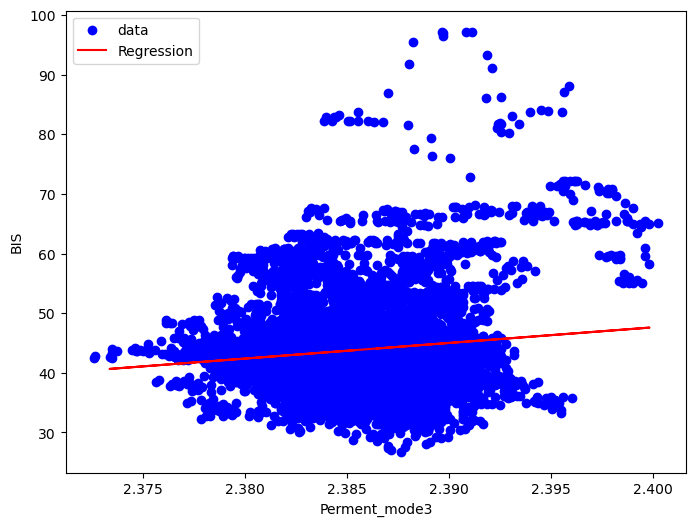

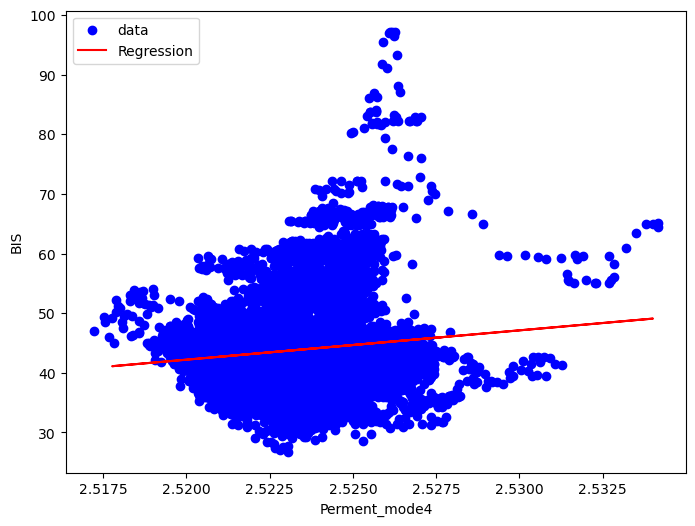

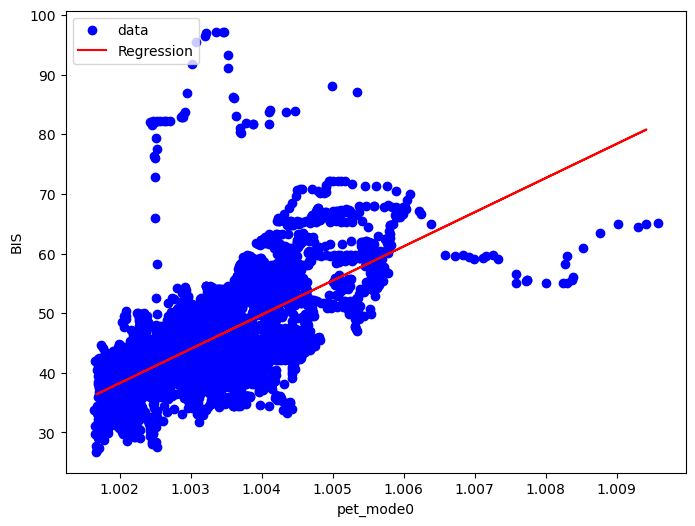

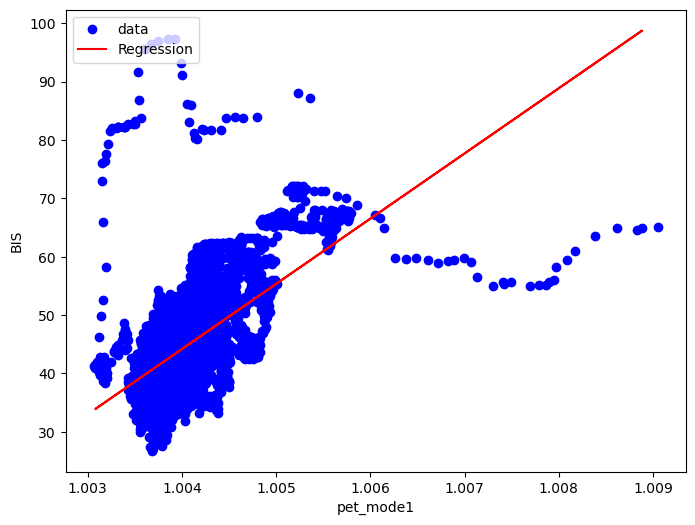

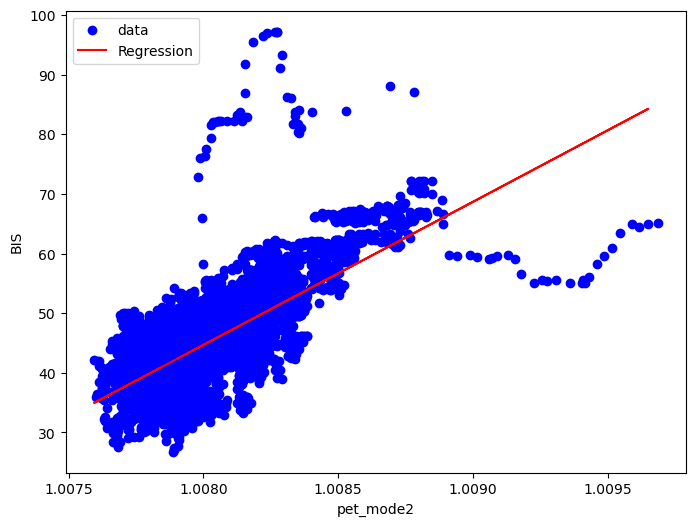

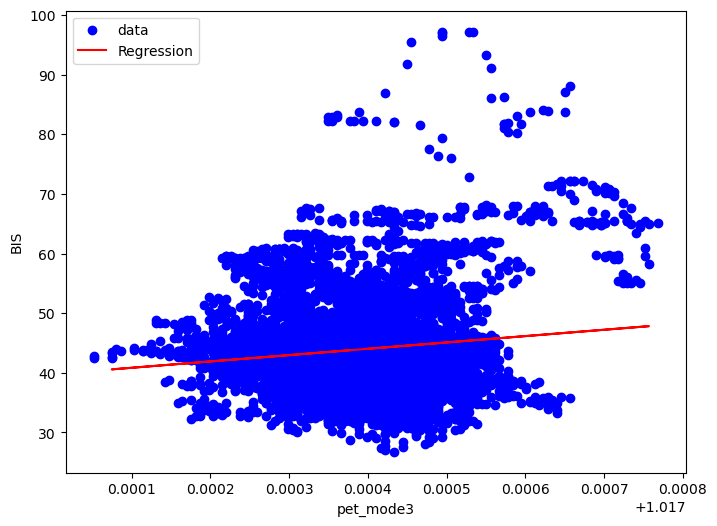

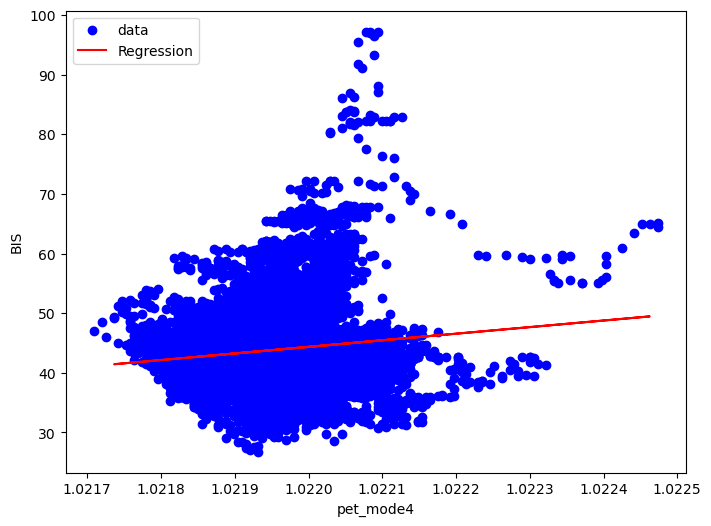

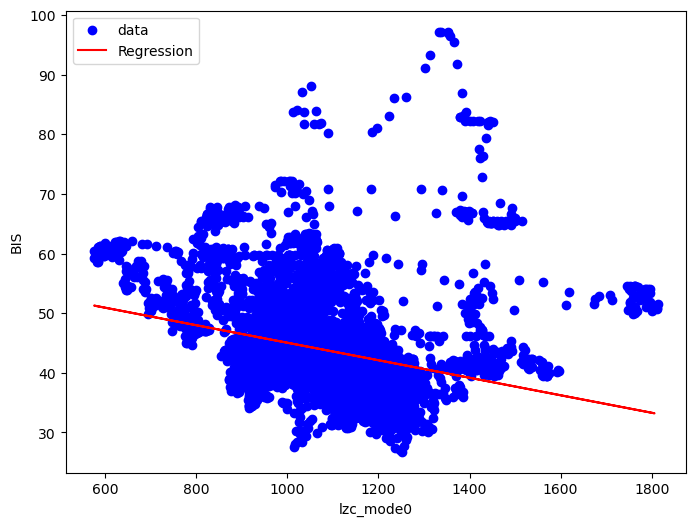

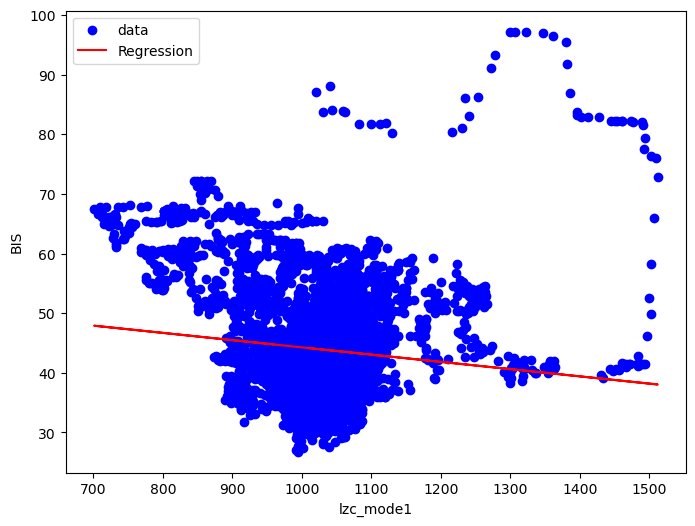

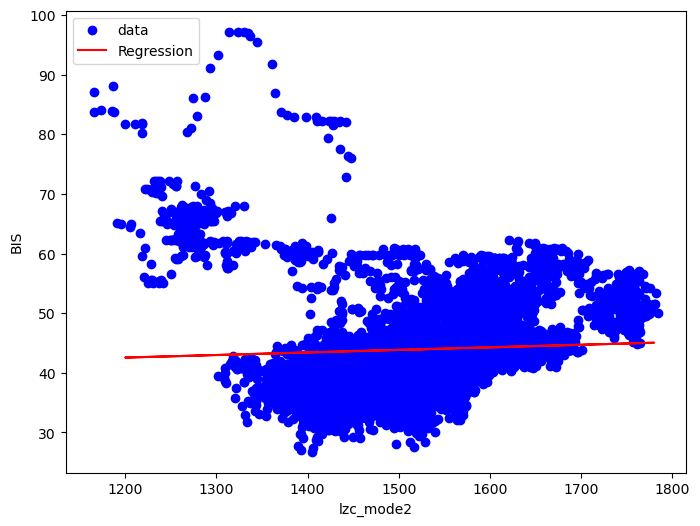

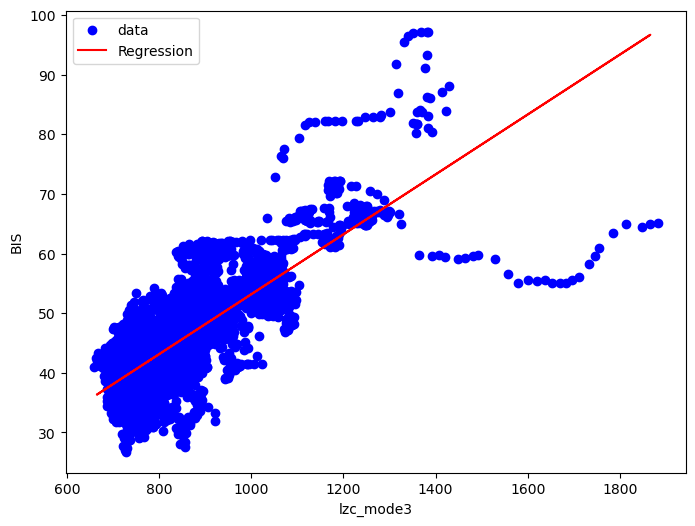

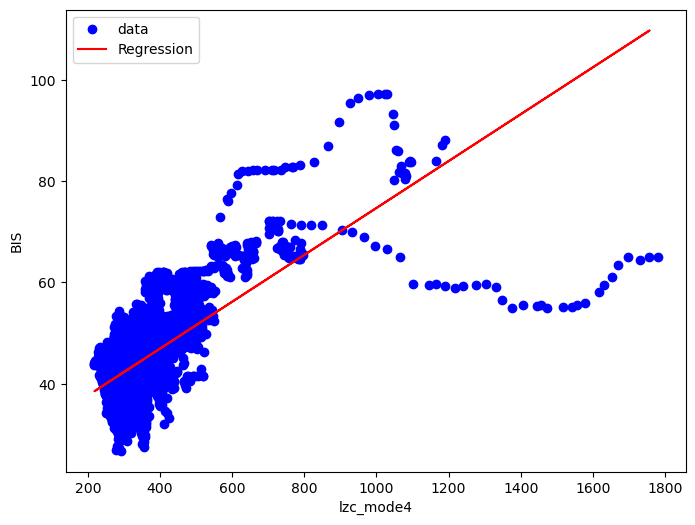

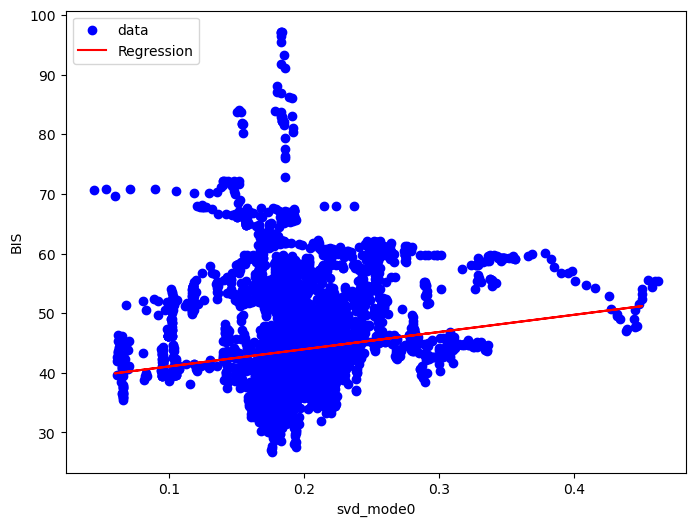

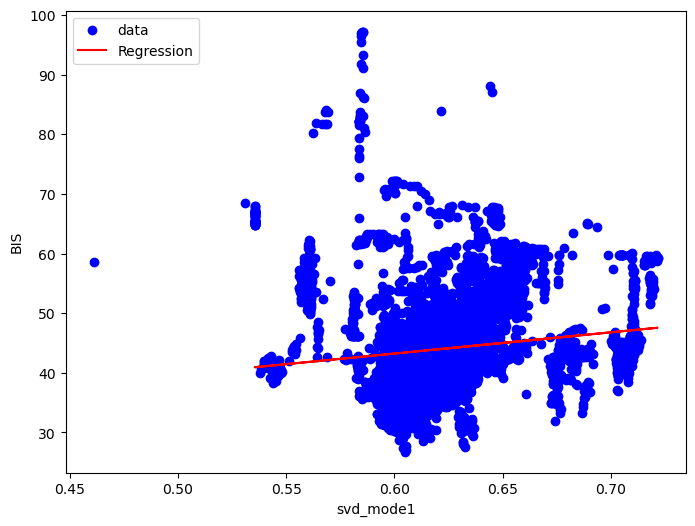

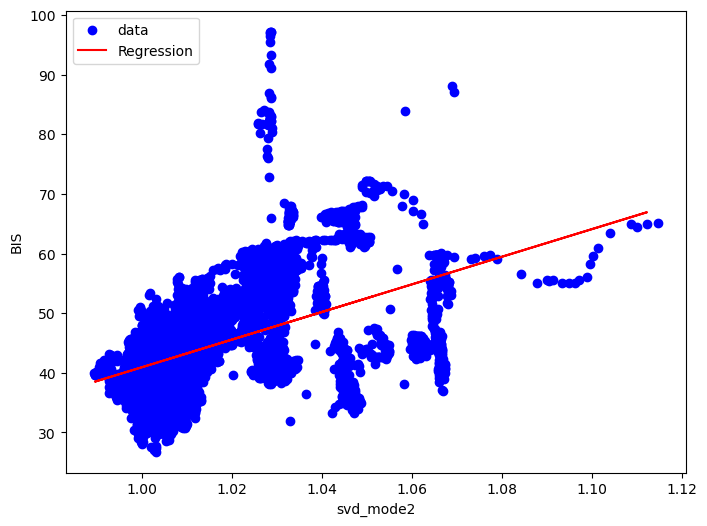

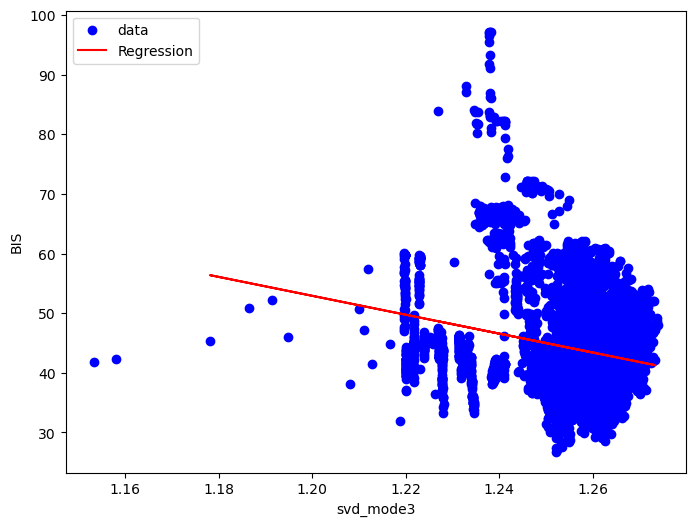

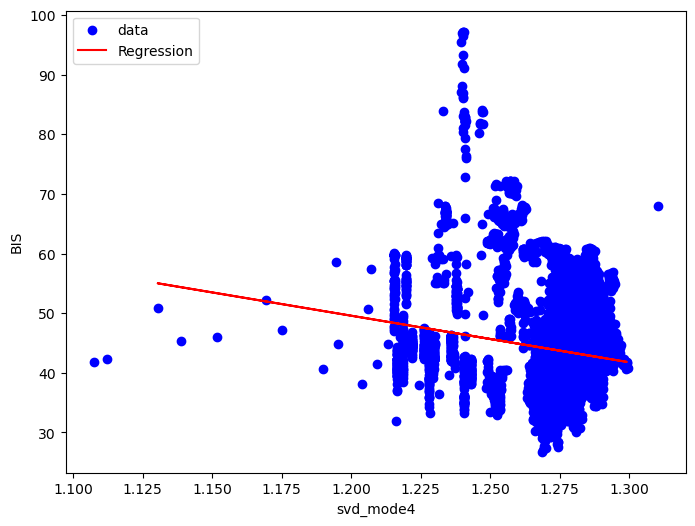

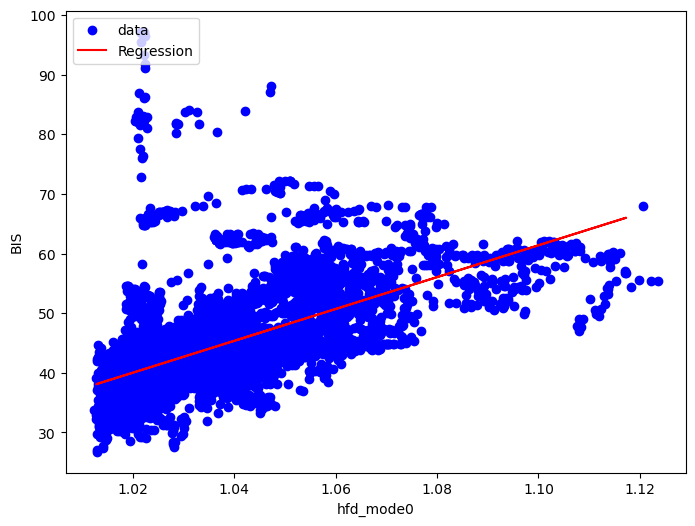

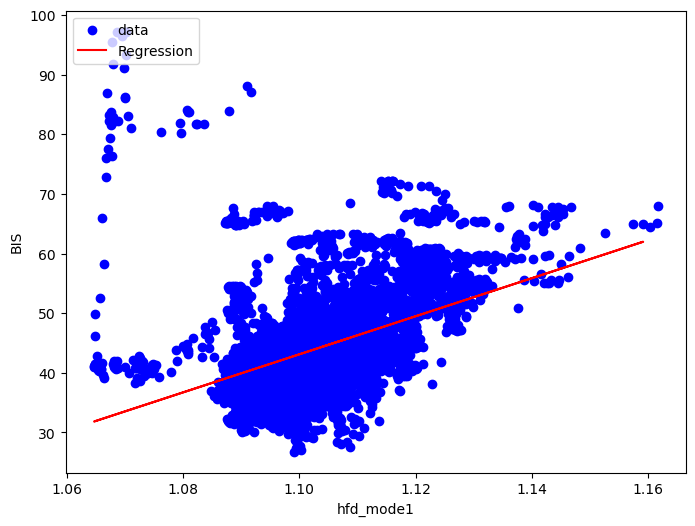

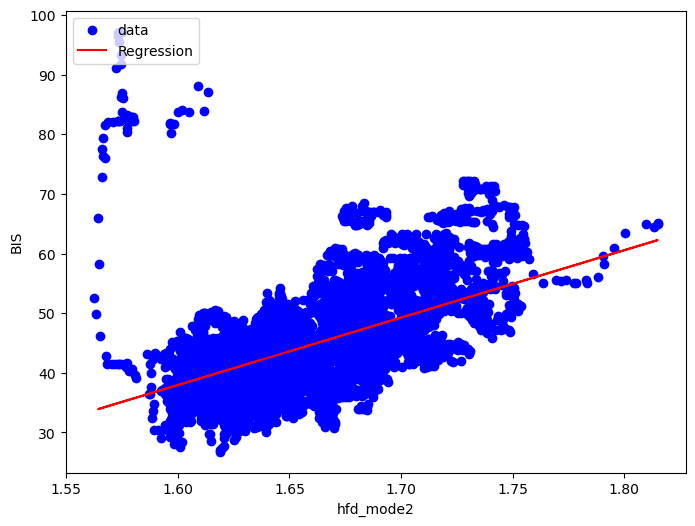

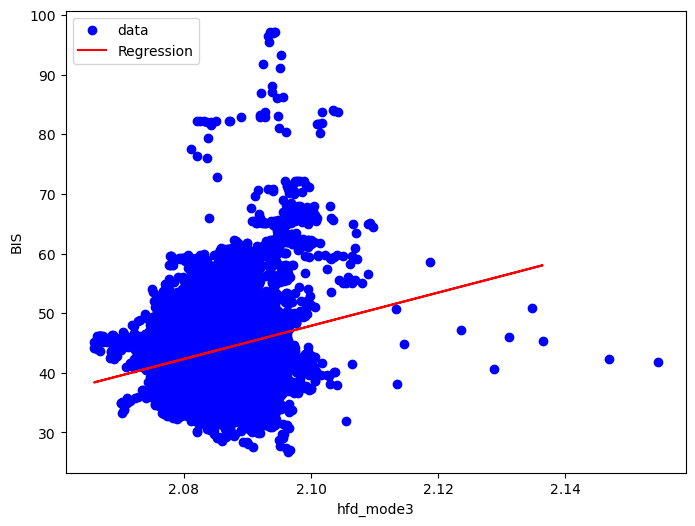

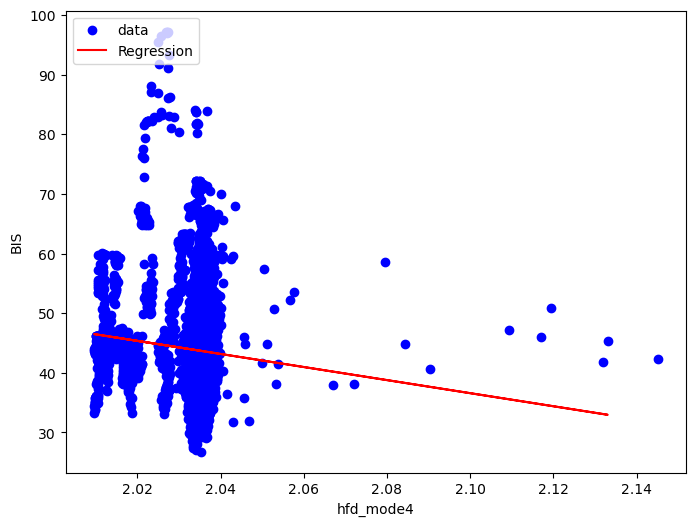

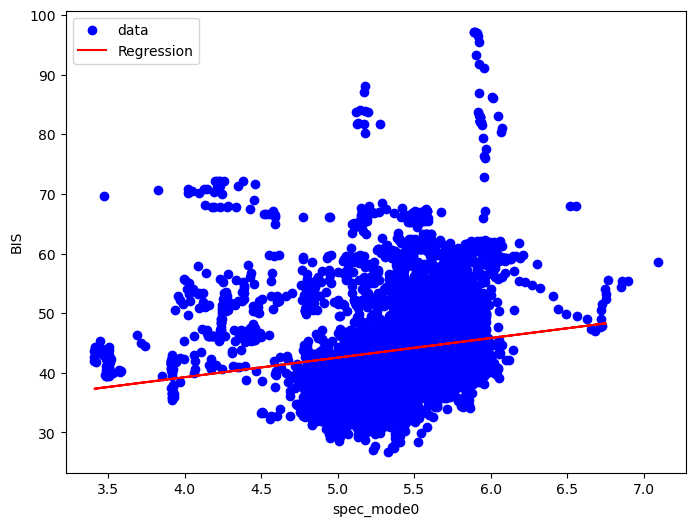

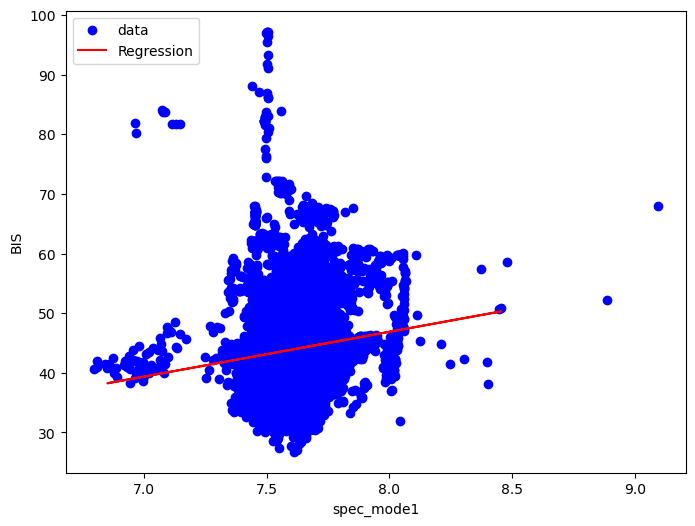

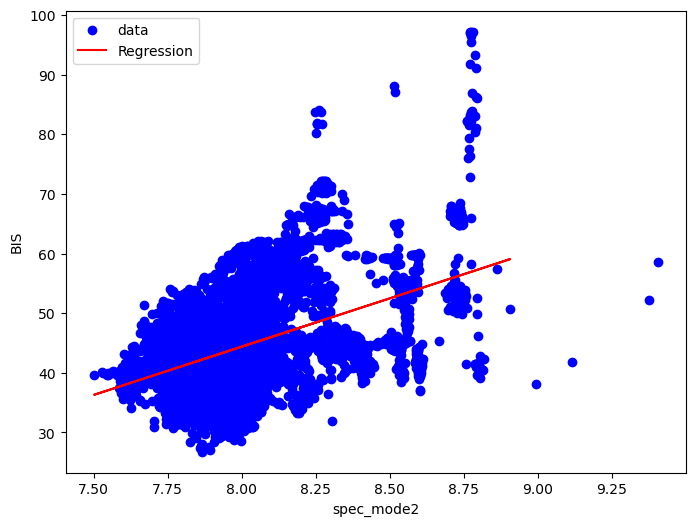

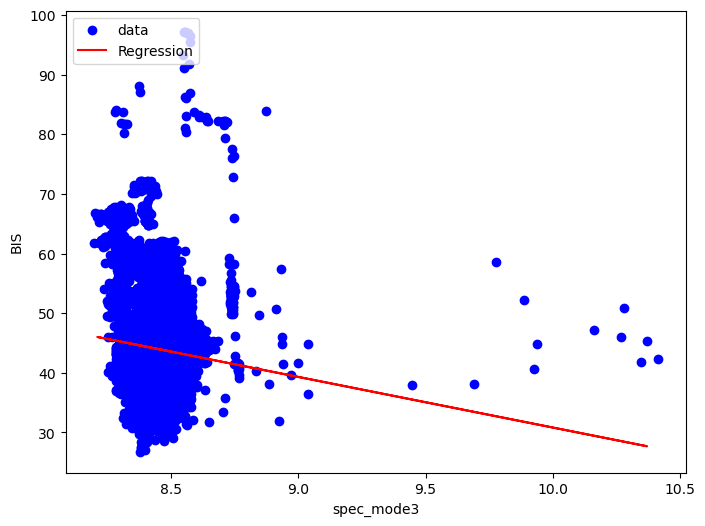

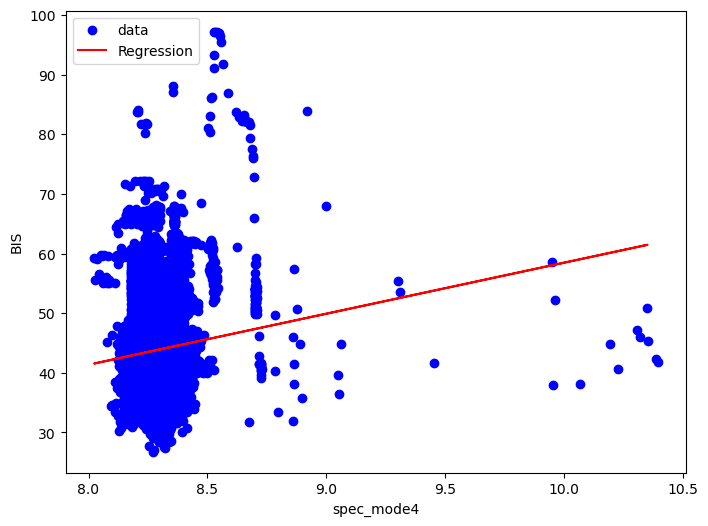

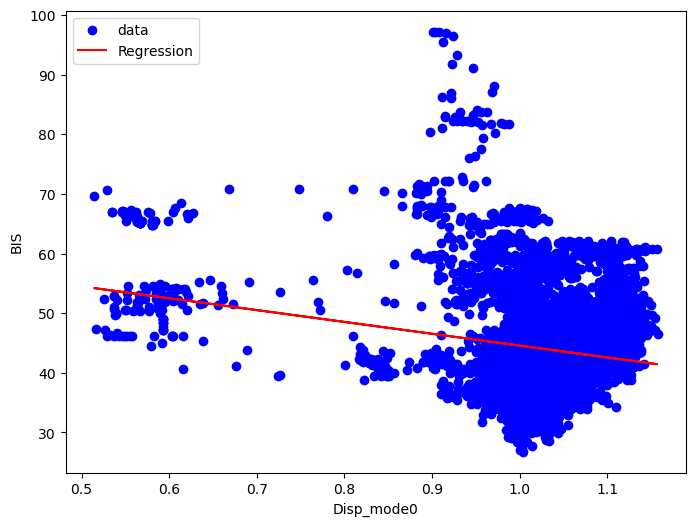

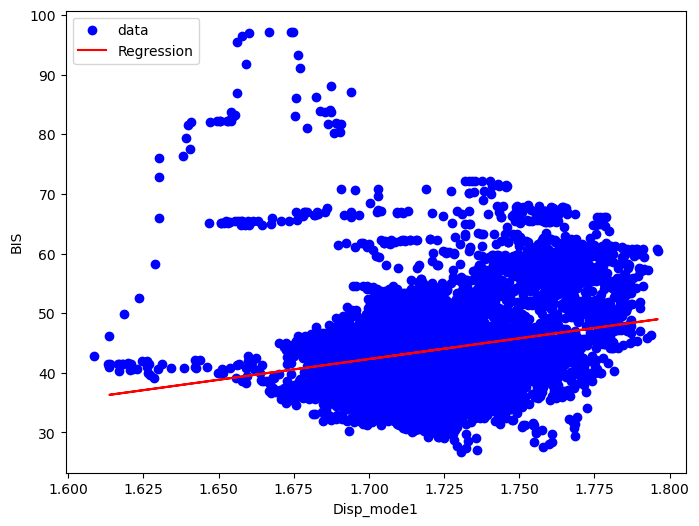

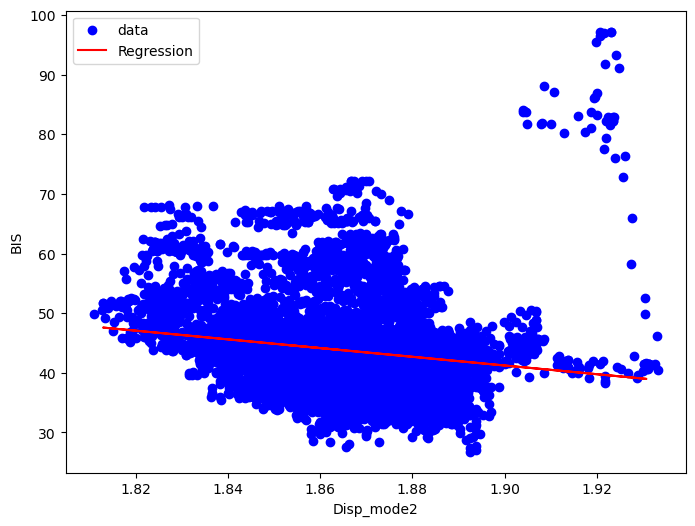

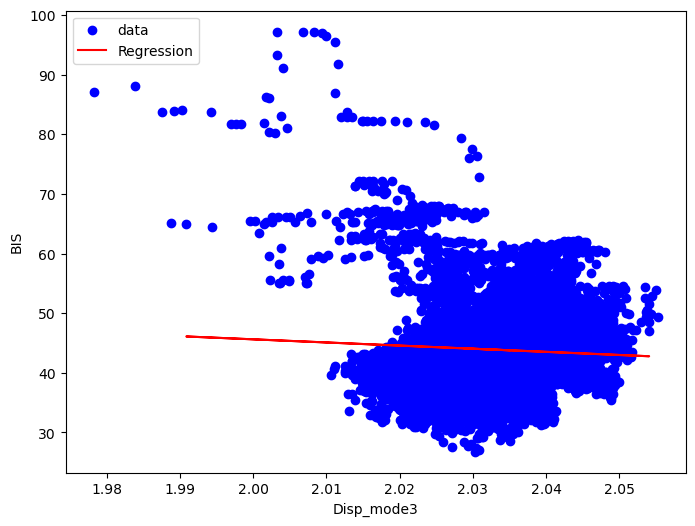

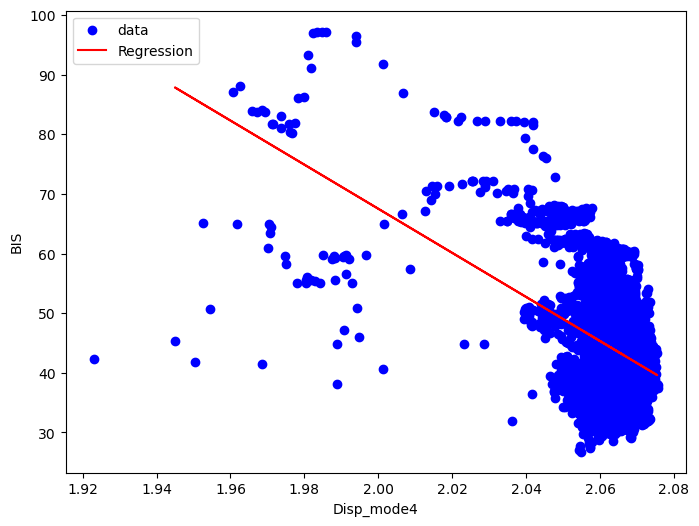

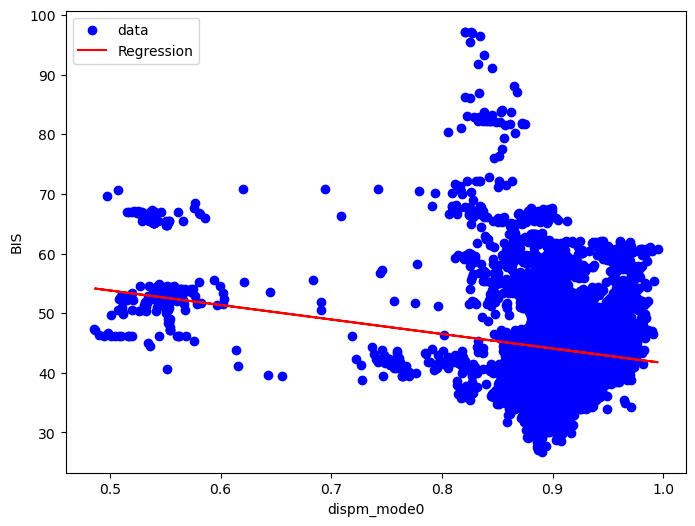

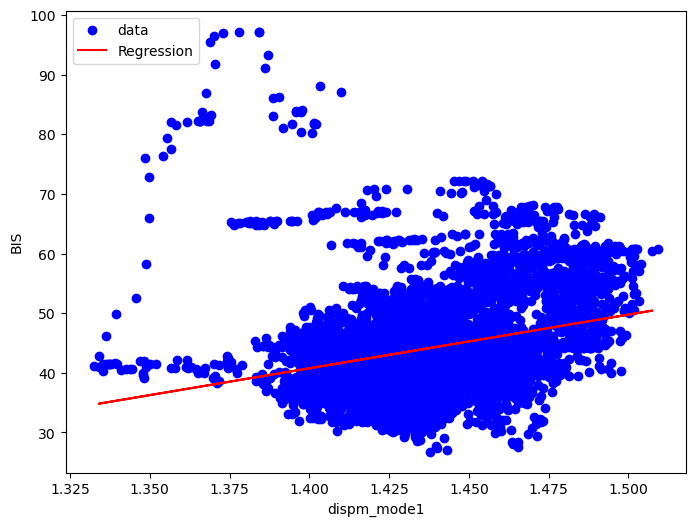

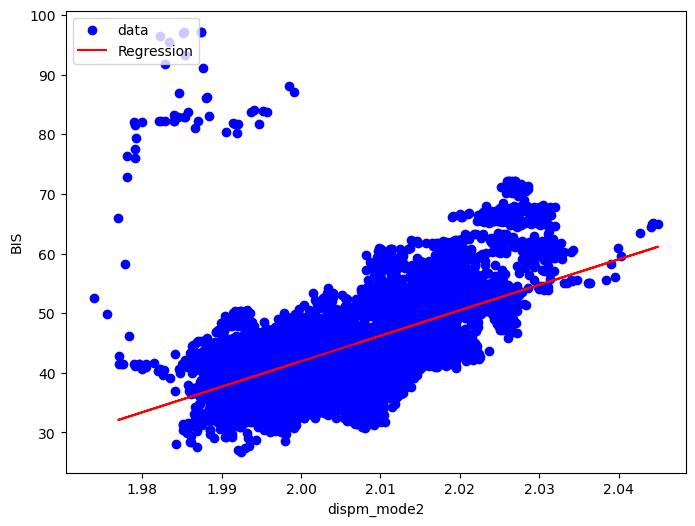

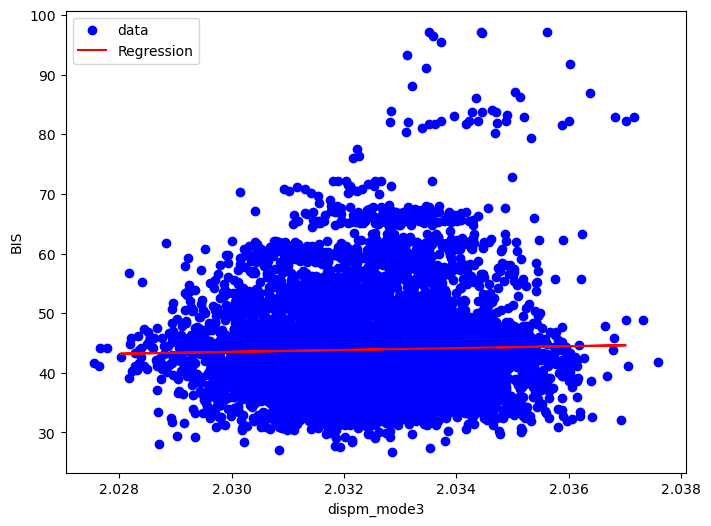

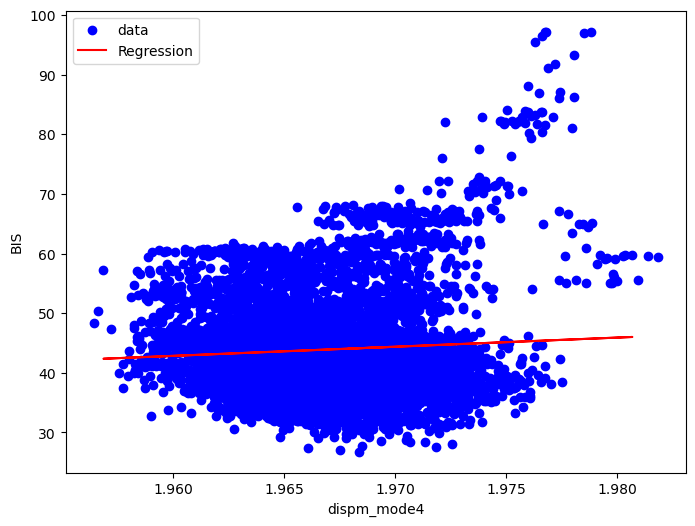

In [6]:
for column in patient.columns:
    if column == "BIS":
        continue
        
    plot_regression(patient, column)
    


In [7]:
# Metrics
total=pd.DataFrame({"Metrics": [key for key in metrics.keys()], "Values": [value*100 for value in metrics.values()]})


In [8]:
sort_total=total.sort_values('Values', ascending=False)
sort_total

,Metrics,Values
33,lzc_mode3_r2,56.321474
22,Perment_mode2_r2,46.308355
27,pet_mode2_r2,46.276138
20,Perment_mode0_r2,46.199678
25,pet_mode0_r2,46.125837
34,lzc_mode4_r2,43.121748
40,hfd_mode0_r2,37.126568
21,Perment_mode1_r2,34.002069
26,pet_mode1_r2,33.036483
57,dispm_mode2_r2,29.727869


### Radom forest feature selection

In [9]:


# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importances_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Display the feature importances
print(feature_importances_df)

# Select the top k features (e.g., top 10 features)
k = 10
selected_features = feature_importances_df.head(k)['feature'].tolist()

# Use only the selected features for further analysis or modeling
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


          feature  importance
33      lzc_mode3    0.485273
40      hfd_mode0    0.121871
34      lzc_mode4    0.091297
30      lzc_mode0    0.032837
20  Perment_mode0    0.024073
52     Disp_mode2    0.015804
32      lzc_mode2    0.013733
42      hfd_mode2    0.011236
35      svd_mode0    0.010126
31      lzc_mode1    0.010115
37      svd_mode2    0.010084
57    dispm_mode2    0.009142
47     spec_mode2    0.008776
25      pet_mode0    0.008481
53     Disp_mode3    0.007369
5        hc_mode0    0.007208
0        hm_mode0    0.006105
55    dispm_mode0    0.006026
6        hc_mode1    0.005945
7        hc_mode2    0.005927
51     Disp_mode1    0.005324
38      svd_mode3    0.005160
54     Disp_mode4    0.004964
49     spec_mode4    0.004942
56    dispm_mode1    0.004560
45     spec_mode0    0.004432
43      hfd_mode3    0.004382
23  Perment_mode3    0.004184
15     detf_mode0    0.003840
22  Perment_mode2    0.003825
4        hm_mode4    0.003700
41      hfd_mode1    0.003498
2        h